# Домашнее задание по статистическому анализу на python

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [17]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)


World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [18]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [48]:
df= df.loc[~df['Freedom'].isin(['NaN'])]
df= df.loc[~df['Positive affect'].isin(['NaN'])]

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

Похоже на равномерное распределение

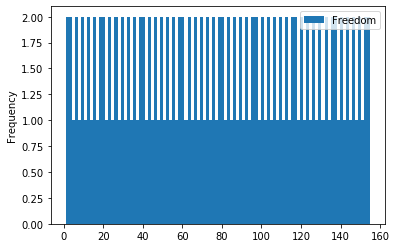

In [50]:
df.plot.hist(x='Positive affect' , y='Freedom',bins=100)

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [51]:
print('Медиана: ', statistics.median(df['Freedom']))


Медиана:  78.0


In [52]:
print('Мода: ', statistics.mode(df['Freedom']))


StatisticsError: no unique mode; found 155 equally common values

In [55]:
std=df['Freedom'].std(skipna=True)
print(std)

44.88875137492688


In [29]:
disp = std**2
print (disp)

2015.0000000000002


In [31]:
min=df['Freedom'].min(skipna=True)
print(min)

1.0


In [32]:
max=df['Freedom'].max(skipna=True)
print(max)

155.0


In [33]:
ex = df['Freedom'].isnull().sum()
print(ex)

1


In [34]:
score=max-min
print(score)

154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент Пирсона:  0.6817698430601656


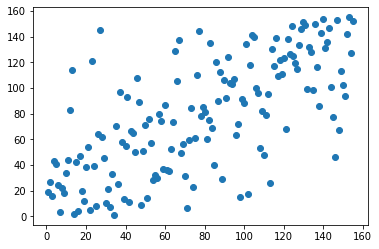

In [56]:
from scipy.stats import pearsonr
freedom= df['Freedom']
positive_affect= df['Positive affect']
corr, p_value =pearsonr(freedom, positive_affect)
plt.scatter(freedom, positive_affect)
print('Коэффициент Пирсона: ', corr)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [65]:
print('Центрирование: ', statistics.mean(freedom))

freedom_norm = freedom - statistics.mean(freedom)
print('Нормализация: ', statistics.mean(freedom_norm))

from sklearn import preprocessing
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_norm = minmax_scaler.fit_transform(np.array(freedom_norm).reshape(-1,1))


Центрирование:  78.0
Нормализация:  0.0


Построить матрицу корреляций для всех колонок таблицы

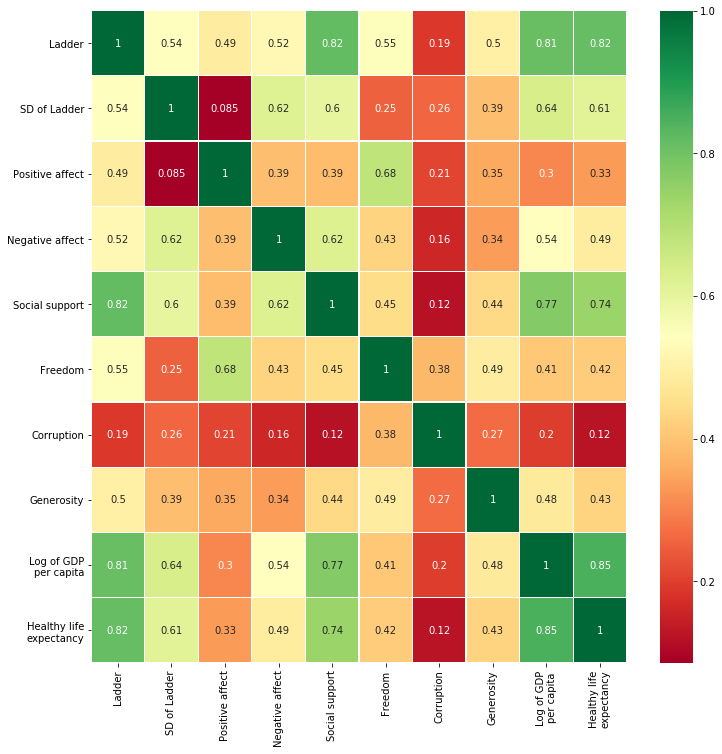

In [66]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [67]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

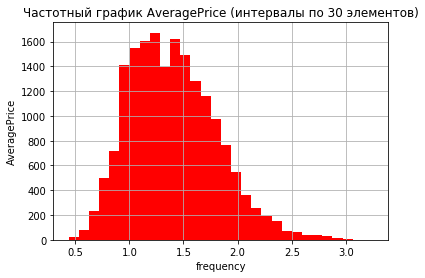

In [71]:
plt.hist(df['AveragePrice'],30, facecolor='red')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (интервалы по 30 элементов)')
plt.grid(True)
plt.show()

In [ ]:
Нормальное распределение со смещением влево

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [72]:
corr_avocado, p_value = pearsonr(df['AveragePrice'], df['4046'])
print(corr_avocado)

-0.20831704848788477
